In [1]:
%matplotlib notebook
#!pip install ipympl
#!pip install ipynb
%matplotlib widget
from ipywidgets import FloatSlider, IntSlider, interact, interact_manual
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import operator
from sklearn.preprocessing import StandardScaler
df_nas = pd.read_csv("KNNI_cat2num.csv")
display(df_nas)

,Unnamed: 0,X,comp_bed_9,mat_dep,mat_age,weight_16,height_16,iq,comp_noint_bed_16,comp_int_bed_16,...,dep_score,comp_house,tv_bed_16,creat_14,comp_games,fam_tv_eve,fam_tv_aft,fam_tv_mor,sex,birth_order
0,1,1,NaN,3.0,30.0,59.294132,181.602831,107.0,NaN,NaN,...,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1,0
1,2,2,NaN,9.0,26.0,NaN,NaN,85.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
2,3,3,NaN,3.0,24.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,2.0,0,0
3,4,4,0.0,NaN,22.0,49.812426,160.224186,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,0
4,5,5,0.0,8.0,31.0,62.270030,191.703227,132.0,1.0,NaN,...,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13729,13730,13730,NaN,13.0,27.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1,0
13730,13731,13731,0.0,6.0,29.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,1.0,2.0,2.0,0,0
13731,13732,13732,NaN,21.0,37.0,58.075832,169.235565,108.0,NaN,NaN,...,NaN,NaN,NaN,1.0,0.0,2.0,2.0,2.0,0,0
13732,13733,13733,0.0,10.0,30.0,NaN,NaN,103.0,NaN,NaN,...,0.0,1.0,NaN,0.0,0.0,0.0,2.0,1.0,0,0


In [2]:
df = pd.read_csv("KNN_Imputation_data.csv")
screen_time_vars = ["text_wend","talk_mob_wend","text_week","talk_mob_week","talk_phon_wend","talk_phon_week","tv_week","tv_wend","comp_wend","comp_week"]
depression_vars = ["dep_score","prim_diag","panic_score","has_dep_diag","secd_diag"]
knn_df = df[screen_time_vars]
display(knn_df)

,text_wend,talk_mob_wend,text_week,talk_mob_week,talk_phon_wend,talk_phon_week,tv_week,tv_wend,comp_wend,comp_week
0,1.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0,2.0
1,0.8,0.8,1.2,1.0,0.8,0.6,1.8,2.4,1.8,2.0
2,0.6,0.6,1.0,0.8,0.6,0.4,2.2,2.6,1.8,2.4
3,0.8,0.8,1.2,1.0,0.8,0.6,2.0,2.4,2.0,2.2
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
13729,1.6,1.0,1.6,1.0,0.6,0.4,1.8,2.2,2.2,1.8
13730,1.0,1.0,1.0,1.0,0.0,0.0,3.0,3.0,2.0,2.0
13731,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,2.0,2.0
13732,2.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,2.0,1.0


In [3]:
!pip install imblearn
!pip install scipy
!pip install scikit-learn

In [4]:
from imblearn.over_sampling import SMOTE

standardise the data and add in an data set imbalance function which fixes the problem of there being little number of depressed people. can just copy and paste this code for the resampling stuff because its important all of ours are the same. benefits and weaknesses of this is found in this website https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/. we used both smote over sampling and under sampling for the best of both worlds


resampling only train data,

oversampling till a sixth of the data,

not using imputed data but dropping na's
    

dep_score
y original
Counter({0.0: 1614, 1.0: 221, 2.0: 145, 3.0: 87, 4.0: 52})
y_train
Counter({0.0: 70, 1.0: 70, 2.0: 70, 3.0: 70, 4.0: 70})
KNN Average score:  0.3729761940499459


<IPython.core.display.Javascript object>


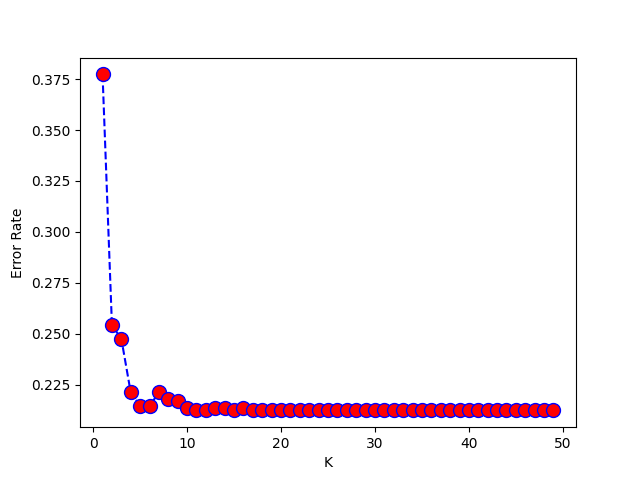

forrest Average score:  0.319927474061878
prim_diag
y original
Counter({0.0: 1697, 1.0: 116, 11.0: 78, 10.0: 55, 2.0: 44, 5.0: 41, 12.0: 35, 6.0: 32, 8.0: 13, 4.0: 4, 9.0: 2, 7.0: 2})
y_train
Counter({0.0: 28, 1.0: 28, 2.0: 28, 4.0: 28, 5.0: 28, 6.0: 28, 7.0: 28, 8.0: 28, 9.0: 28, 10.0: 28, 11.0: 28, 12.0: 28})
KNN Average score:  0.28331502300640987


<IPython.core.display.Javascript object>


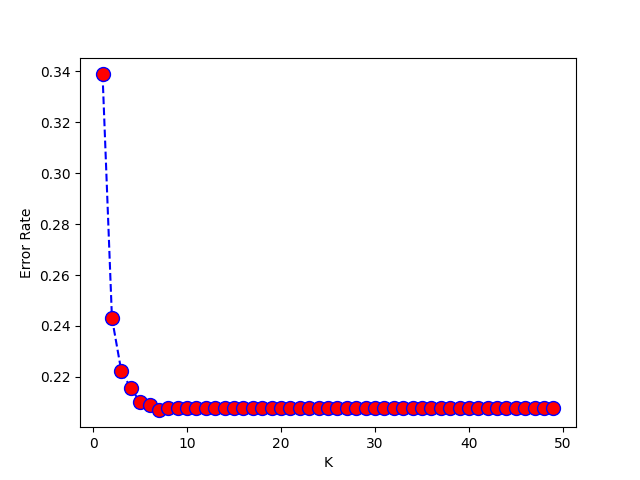

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


forrest Average score:  0.24790436036656072
panic_score
y original
Counter({0.0: 2082, 1.0: 17, 2.0: 7, 4.0: 7, 3.0: 6})
y_train
Counter({0.0: 70, 1.0: 70, 2.0: 70, 3.0: 70, 4.0: 70})
KNN Average score:  0.6522342894133543


<IPython.core.display.Javascript object>


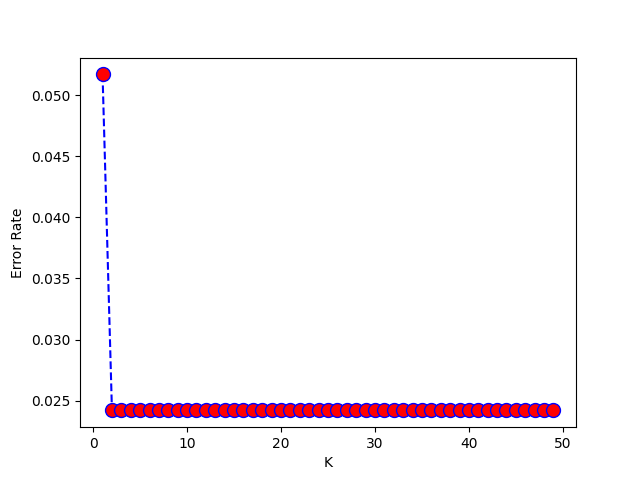

forrest Average score:  0.8031036997320038
has_dep_diag
y original
Counter({0.0: 1963, 1.0: 156})
y_train
Counter({0.0: 176, 1.0: 176})
KNN Average score:  0.6456598795401989


<IPython.core.display.Javascript object>


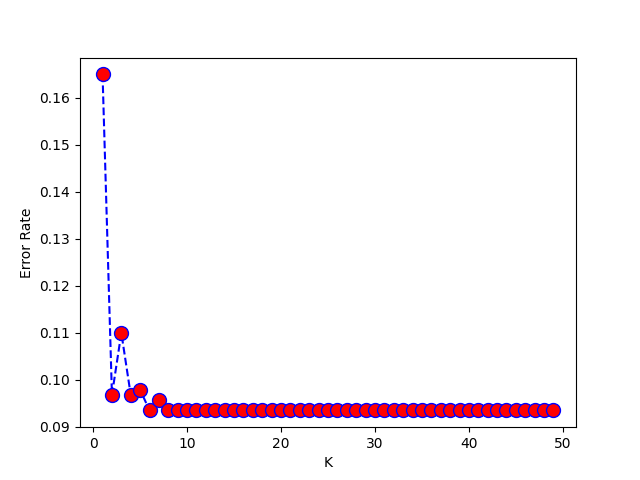

forrest Average score:  0.6184593102190628
secd_diag
y original
Counter({0.0: 1888, 1.0: 91, 8.0: 44, 4.0: 29, 2.0: 22, 5.0: 20, 9.0: 12, 6.0: 10, 7.0: 3})
y_train
Counter({0.0: 38, 1.0: 38, 2.0: 38, 4.0: 38, 5.0: 38, 6.0: 38, 7.0: 38, 8.0: 38, 9.0: 38})
KNN Average score:  0.3716027069618547


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


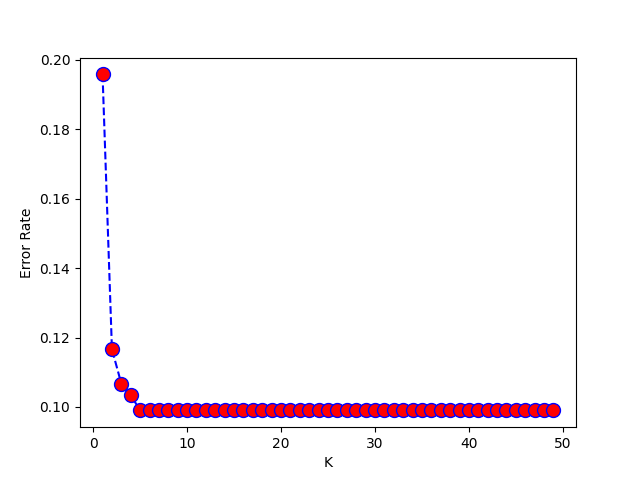

forrest Average score:  0.33809285443871845
KNN Average of depression variables =  0.4651576185943528
KNN Average of depression variables =  0.4654975397636448


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()

totalknn =0 
totalforrest =0 
for i in range(len(depression_vars)):
    temp = screen_time_vars + [depression_vars[i]]
    dropped = df_nas[temp].dropna()
    y= np.rint(dropped[depression_vars[i]].to_numpy())
    dropped.pop(depression_vars[i])
    X= scaler.fit_transform(dropped)
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    smote_strat={}
    under_strat={}
    for category in Counter(y_train).keys():
        if Counter(y_train)[category] > round(len(y_train)/(len(Counter(y_train))*6)):
            smote_strat[category] = Counter(y_train)[category]
            under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*6)))-1
        else:
            smote_strat[category] = (round(len(y_train)/(len(Counter(y_train))*6)))-1
            under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*6)))-1
    
    
    smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
    under = RandomUnderSampler(sampling_strategy=under_strat)

    steps = [('o', smote), ('u', under)]
    pipeline = Pipeline(steps=steps)
    
    x_resample, y_resample = pipeline.fit_resample(X_train, y_train)
    
    
    #X_train,X_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_resample,y_resample)
    pred = knn.predict(X_test)
    print(depression_vars[i])
    print("y original")
    print(Counter(y_train))
    print("y_train")
    print(Counter(y_resample))
    knnaccuracy = accuracy_score(y_test,pred)
    knnprecision= precision_score(y_test,pred,average='weighted')
    knnrecall = recall_score(y_test,pred,average='weighted')
    knnf1 = f1_score(y_test,pred,average='weighted')
    knnf2 = fbeta_score(y_test,pred,beta=2,average='weighted')
    #print("KNN Accuracy score: ",accuracy_score(y_test,pred))
    #print("KNN Precision score: ",precision_score(y_test,pred,average='weighted'))
    #print("KNN recall score: ",recall_score(y_test,pred,average='weighted'))
    #print("KNN F1 score: ",f1_score(y_test,pred,average='weighted'))
    #print("KNN F2 score: ",fbeta_score(y_test,pred,beta=2,average='weighted'))
    knnaveragescore = (knnaccuracy + knnprecision + knnrecall + knnf1 + knnf2)/5
    print("KNN Average score: ",knnaveragescore)
    totalknn +=knnaveragescore
    
    error_rate = []
    for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    plt.figure()
    plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 10)
    plt.xlabel('K')
    plt.ylabel("Error Rate")

    clf=RandomForestClassifier(n_estimators=20)
    clf.fit(x_resample,y_resample)
    y_pred=clf.predict(X_test)
    forrestaccuracy = accuracy_score(y_test,y_pred)
    forrestprecision= precision_score(y_test,y_pred,average='weighted')
    forrestrecall = recall_score(y_test,y_pred,average='weighted')
    forrestf1 = f1_score(y_test,y_pred,average='weighted')
    forrestf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    forrestaveragescore = (forrestaccuracy + forrestprecision + forrestrecall + forrestf1 + forrestf2)/5
    print("forrest Average score: ",forrestaveragescore)
    totalforrest +=forrestaveragescore
print("KNN Average of depression variables = ",str(totalknn/5))
print("KNN Average of depression variables = ",str(totalforrest/5))

resampling only train data,

oversampling till a sixth of the data,

using imputed data 

dep_score
0.38458333333333333
4.5
y original
Counter({0.0: 6343, 1.0: 2753, 2.0: 332, 3.0: 114, 4.0: 71})
y_train
Counter({0.0: 480, 1.0: 480, 2.0: 480, 3.0: 480, 4.0: 480})
KNN Average score:  0.4106467792484662


<IPython.core.display.Javascript object>


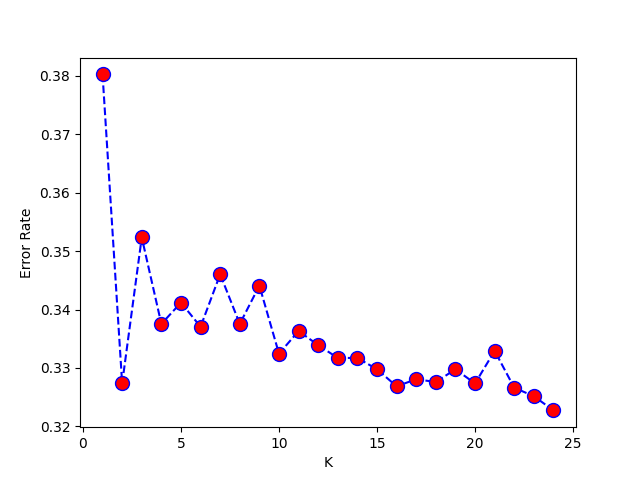

forrest Average score:  0.42880083029076
prim_diag
0.3733277591973244
4.5
y original
Counter({0.0: 5481, 2.0: 1757, 1.0: 1002, 3.0: 431, 4.0: 363, 5.0: 173, 11.0: 127, 10.0: 96, 6.0: 83, 12.0: 50, 7.0: 29, 8.0: 19, 9.0: 2})
y_train
Counter({0.0: 184, 1.0: 184, 2.0: 184, 3.0: 184, 4.0: 184, 5.0: 184, 6.0: 184, 7.0: 184, 8.0: 184, 9.0: 184, 10.0: 184, 11.0: 184, 12.0: 184})
KNN Average score:  0.2417826928926104


<IPython.core.display.Javascript object>


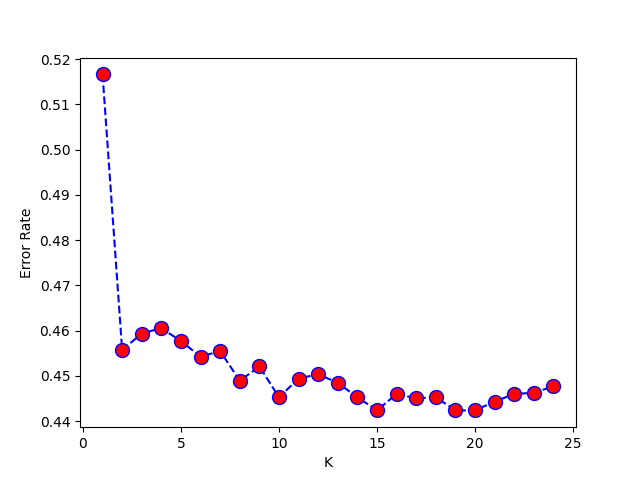

forrest Average score:  0.2279328901203234
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
0.4083333333333333
39.5
y original
Counter({0.0: 9376, 1.0: 191, 2.0: 28, 3.0: 12, 4.0: 6})
y_train
Count

<IPython.core.display.Javascript object>


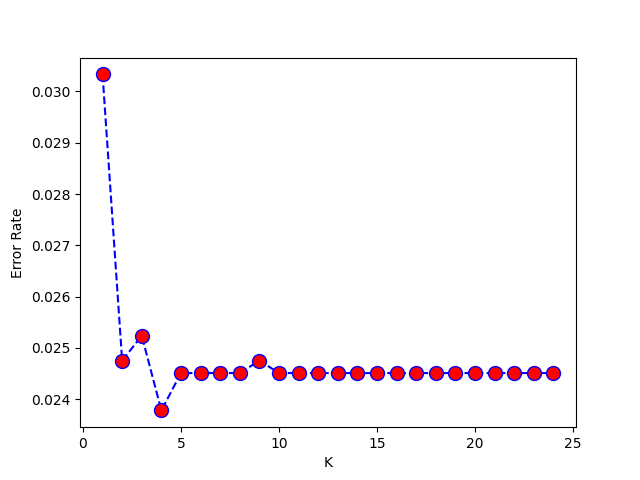

forrest Average score:  0.5345637285300422
has_dep_diag
0.361781848459617
4.5
y original
Counter({0.0: 9281, 1.0: 332})
y_train
Counter({0.0: 1201, 1.0: 1201})
KNN Average score:  0.8413931466937667


<IPython.core.display.Javascript object>


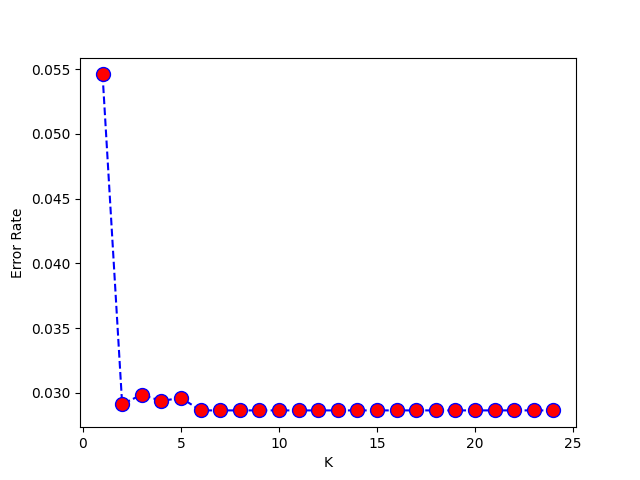

forrest Average score:  0.8854377096156656
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
0.4021978021978022
11.0
y original
Counter({0.0: 7558, 1.0: 929, 2.0: 838, 3.0: 108, 8.0: 65, 4.0: 55, 5.0: 30, 9.0: 15, 6.0: 12, 7.0: 3})
y_train
Counter({0.0: 91, 1.0: 91, 2.0: 91, 3.0: 91, 4.0: 91, 5.0: 91, 6.0: 91, 7.0: 91, 8.0: 91, 9.0: 91})
KNN Average score:  0.2888851207765818


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


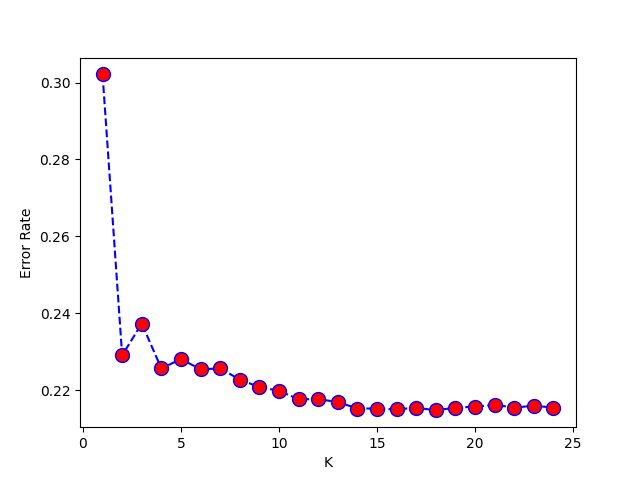

forrest Average score:  0.3259644429221069
KNN Average of depression variables =  0.452303166682385
Forest Average of depression variables =  0.4805399202957796


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()

totalknn =0 
totalforrest =0 
for i in range(len(depression_vars)):
    temp = screen_time_vars + [depression_vars[i]]
    dropped = df[temp].dropna()
    y= np.rint(dropped[depression_vars[i]].to_numpy())
    dropped.pop(depression_vars[i])
    X= scaler.fit_transform(dropped)
    imputedpercent = 0.7
    factor = 4
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    while (imputedpercent > 0.41):
        smote_strat={}
        under_strat={}
        for category in Counter(y_train).keys():
            if Counter(y_train)[category] > round(len(y_train)/(len(Counter(y_train))*factor)):
                smote_strat[category] = Counter(y_train)[category]
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
            else:
                smote_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1


        smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
        under = RandomUnderSampler(sampling_strategy=under_strat)

        steps = [('o', smote), ('u', under)]
        pipeline = Pipeline(steps=steps)

        x_resample, y_resample = pipeline.fit_resample(X_train, y_train)


        #X_train,X_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3)
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(x_resample,y_resample)
        pred = knn.predict(X_test)
        print(depression_vars[i])

        tot = 0
        for j in range (len(Counter(y_resample))):
            if Counter(y_resample)[j]>Counter(y_train)[j]:
                tot = tot + (Counter(y_resample)[j] - Counter(y_train)[j])
        #print("percentage imputed")
        imputedpercent = tot/(Counter(y_resample)[1]*len(Counter(y_resample)))
        factor = factor + 0.5
    print(imputedpercent)
    print(factor)
    print("y original")
    print(Counter(y_train))
    print("y_train")
    print(Counter(y_resample))
    
    knnaccuracy = accuracy_score(y_test,pred)
    knnprecision= precision_score(y_test,pred,average='weighted')
    knnrecall = recall_score(y_test,pred,average='weighted')
    knnf1 = f1_score(y_test,pred,average='weighted')
    knnf2 = fbeta_score(y_test,pred,beta=2,average='weighted')
    #print("KNN Accuracy score: ",accuracy_score(y_test,pred))
    #print("KNN Precision score: ",precision_score(y_test,pred,average='weighted'))
    #print("KNN recall score: ",recall_score(y_test,pred,average='weighted'))
    #print("KNN F1 score: ",f1_score(y_test,pred,average='weighted'))
    #print("KNN F2 score: ",fbeta_score(y_test,pred,beta=2,average='weighted'))
    knnaveragescore = (knnaccuracy + knnprecision + knnrecall + knnf1 + knnf2)/5
    print("KNN Average score: ",knnaveragescore)
    totalknn +=knnaveragescore
    
    error_rate = []
    for j in range(1,25):
        knn = KNeighborsClassifier(n_neighbors=j)
        knn.fit(X_train,y_train)
        pred_j = knn.predict(X_test)
        error_rate.append(np.mean(pred_j != y_test))
    plt.figure()
    plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 10)
    plt.xlabel('K')
    plt.ylabel("Error Rate")

    clf=RandomForestClassifier(n_estimators=20)
    clf.fit(x_resample,y_resample)
    y_pred=clf.predict(X_test)
    forrestaccuracy = accuracy_score(y_test,y_pred)
    forrestprecision= precision_score(y_test,y_pred,average='weighted')
    forrestrecall = recall_score(y_test,y_pred,average='weighted')
    forrestf1 = f1_score(y_test,y_pred,average='weighted')
    forrestf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    forrestaveragescore = (forrestaccuracy + forrestprecision + forrestrecall + forrestf1 + forrestf2)/5
    print("forrest Average score: ",forrestaveragescore)
    totalforrest +=forrestaveragescore
print("KNN Average of depression variables = ",str(totalknn/5))
print("Forest Average of depression variables = ",str(totalforrest/5))

same as above but added random forrest tuning


dep_score
0.39916666666666667
4.5
y original
Counter({0.0: 6416, 1.0: 2715, 2.0: 312, 3.0: 105, 4.0: 65})
y_train
Counter({0.0: 480, 1.0: 480, 2.0: 480, 3.0: 480, 4.0: 480})
KNN Average score:  0.4270573365826076


<IPython.core.display.Javascript object>


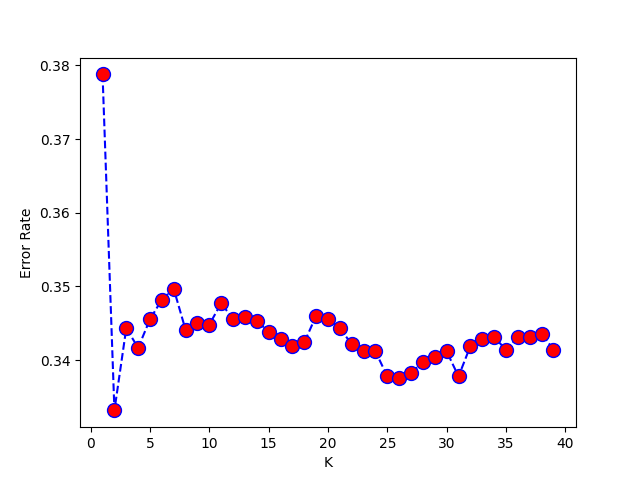

forrest Average score:  0.41198305524354756


<IPython.core.display.Javascript object>


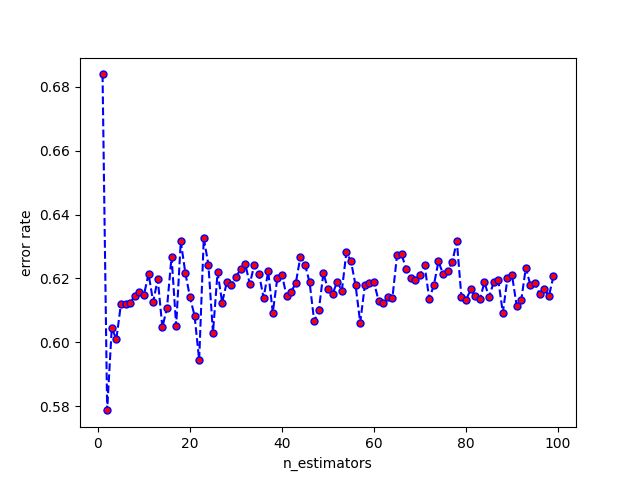

prim_diag
0.3741638795986622
4.5
y original
Counter({0.0: 5459, 2.0: 1764, 1.0: 1050, 3.0: 432, 4.0: 331, 5.0: 168, 11.0: 123, 10.0: 94, 6.0: 87, 12.0: 53, 7.0: 26, 8.0: 20, 9.0: 6})
y_train
Counter({0.0: 184, 1.0: 184, 2.0: 184, 3.0: 184, 4.0: 184, 5.0: 184, 6.0: 184, 7.0: 184, 8.0: 184, 9.0: 184, 10.0: 184, 11.0: 184, 12.0: 184})
KNN Average score:  0.2380695055599638


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


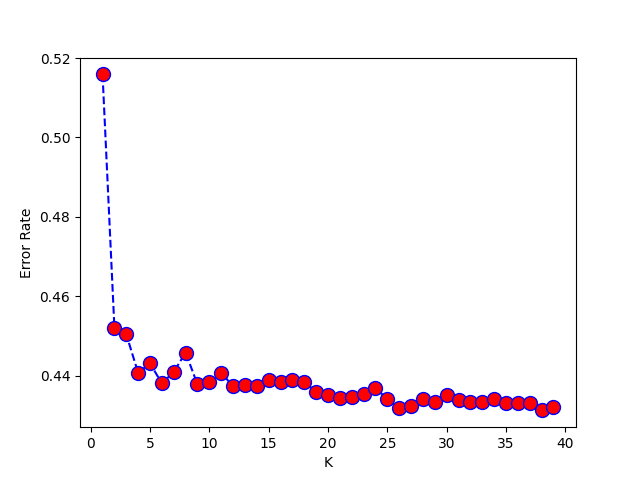

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


forrest Average score:  0.24514971622612208


<IPython.core.display.Javascript object>


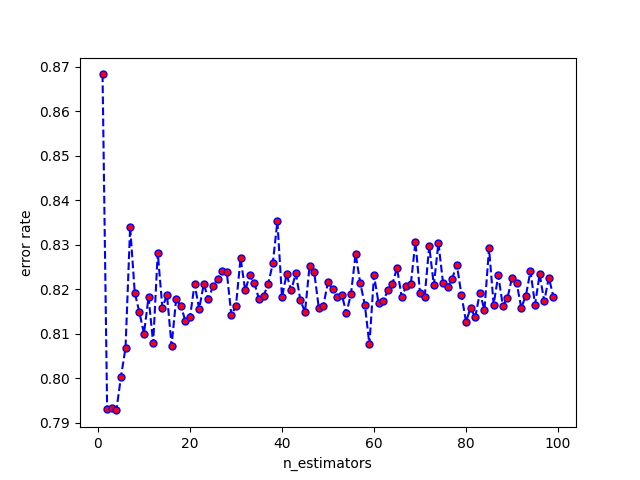

panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
pani

<IPython.core.display.Javascript object>


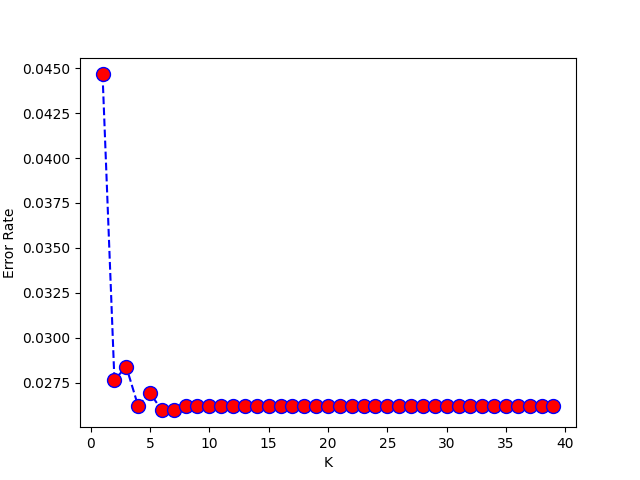

forrest Average score:  0.5549690988944874


<IPython.core.display.Javascript object>


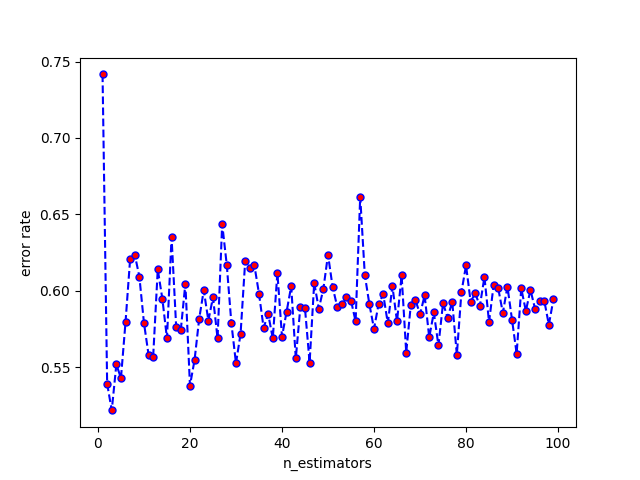

has_dep_diag
0.36261448792672774
4.5
y original
Counter({0.0: 9283, 1.0: 330})
y_train
Counter({0.0: 1201, 1.0: 1201})
KNN Average score:  0.8425121805424659


<IPython.core.display.Javascript object>


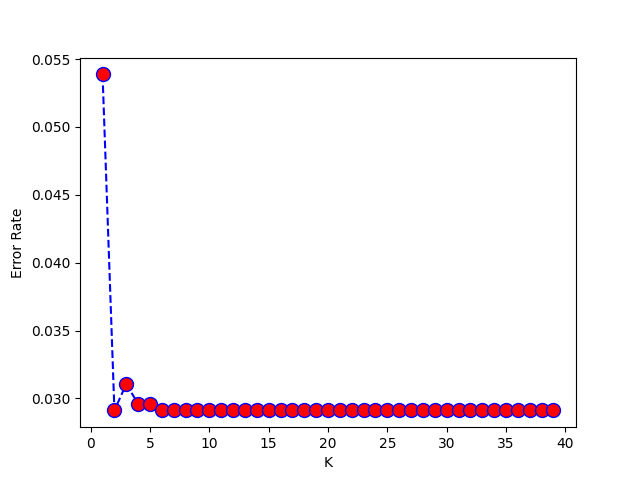

forrest Average score:  0.8911955687595974


<IPython.core.display.Javascript object>


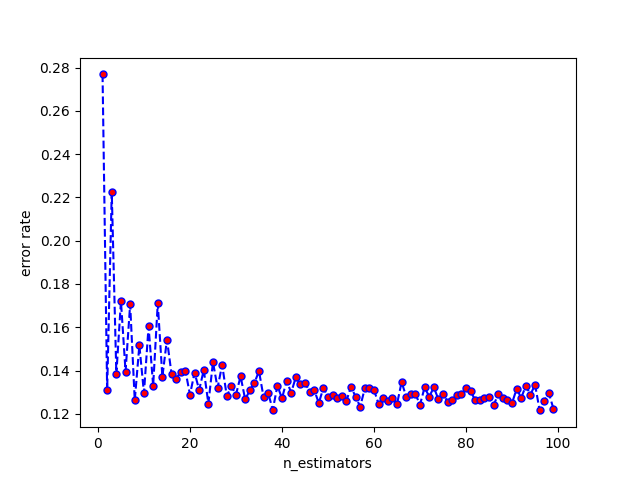

secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
0.4031578947368421
10.5
y original
Counter({0.0: 7560, 1.0: 948, 2.0: 812, 3.0: 106, 4.0: 60, 8.0: 60, 5.0: 34, 6.0: 16, 9.0: 14, 7.0: 3})
y_train
Counter({0.0: 95, 1.0: 95, 2.0: 95, 3.0: 95, 4.0: 95, 5.0: 95, 6.0: 95, 7.0: 95, 8.0: 95, 9.0: 95})
KNN Average score:  0.30292081715208086


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


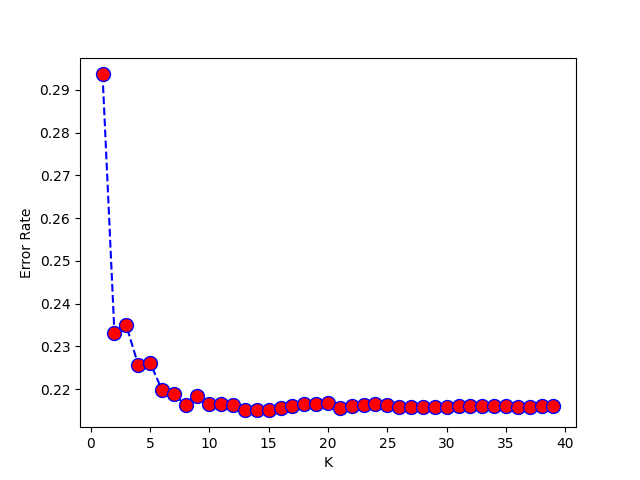

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


forrest Average score:  0.3075310335520374


<IPython.core.display.Javascript object>


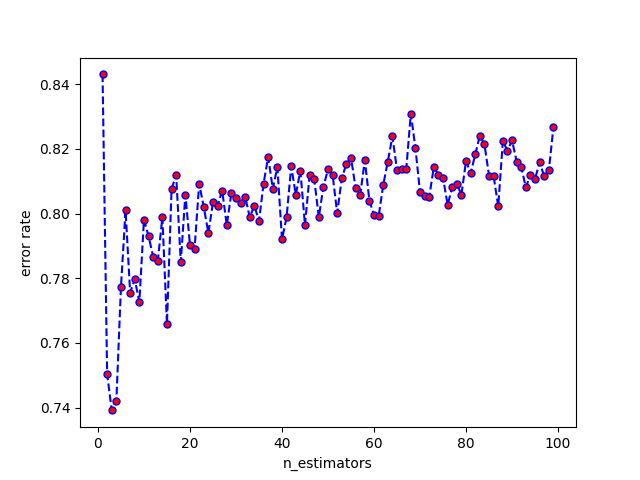

KNN Average of depression variables =  0.4637039062594167
Forest Average of depression variables =  0.48216569453515845


In [9]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()

totalknn =0 
totalforrest =0 
for i in range(len(depression_vars)):
    temp = screen_time_vars + [depression_vars[i]]
    dropped = df[temp].dropna()
    y= np.rint(dropped[depression_vars[i]].to_numpy())
    dropped.pop(depression_vars[i])
    X= scaler.fit_transform(dropped)
    imputedpercent = 0.7
    factor = 4
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    while (imputedpercent > 0.41):
        smote_strat={}
        under_strat={}
        for category in Counter(y_train).keys():
            if Counter(y_train)[category] > round(len(y_train)/(len(Counter(y_train))*factor)):
                smote_strat[category] = Counter(y_train)[category]
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
            else:
                smote_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1


        smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
        under = RandomUnderSampler(sampling_strategy=under_strat)

        steps = [('o', smote), ('u', under)]
        pipeline = Pipeline(steps=steps)

        x_resample, y_resample = pipeline.fit_resample(X_train, y_train)


        #X_train,X_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3)
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(x_resample,y_resample)
        pred = knn.predict(X_test)
        print(depression_vars[i])

        tot = 0
        for j in range (len(Counter(y_resample))):
            if Counter(y_resample)[j]>Counter(y_train)[j]:
                tot = tot + (Counter(y_resample)[j] - Counter(y_train)[j])
        #print("percentage imputed")
        imputedpercent = tot/(Counter(y_resample)[1]*len(Counter(y_resample)))
        factor = factor + 0.5
    print(imputedpercent)
    print(factor)
    print("y original")
    print(Counter(y_train))
    print("y_train")
    print(Counter(y_resample))
    
    knnaccuracy = accuracy_score(y_test,pred)
    knnprecision= precision_score(y_test,pred,average='weighted')
    knnrecall = recall_score(y_test,pred,average='weighted')
    knnf1 = f1_score(y_test,pred,average='weighted')
    knnf2 = fbeta_score(y_test,pred,beta=2,average='weighted')
    print("KNN Accuracy score: ",accuracy_score(y_test,pred))
    #print("KNN Precision score: ",precision_score(y_test,pred,average='weighted'))
    #print("KNN recall score: ",recall_score(y_test,pred,average='weighted'))
    print("KNN F1 score: ",f1_score(y_test,pred,average='weighted'))
    print("KNN F2 score: ",fbeta_score(y_test,pred,beta=2,average='weighted'))
    knnaveragescore = (knnaccuracy + knnprecision + knnrecall + knnf1 + knnf2)/5
    print("KNN Average score: ",knnaveragescore)
    totalknn +=knnaveragescore
    
    error_rate = []
    for j in range(1,40):
        knn = KNeighborsClassifier(n_neighbors=j)
        knn.fit(X_train,y_train)
        pred_j = knn.predict(X_test)
        error_rate.append(np.mean(pred_j != y_test))
    plt.figure()
    plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 10)
    plt.xlabel('K')
    plt.ylabel("Error Rate")

    
    
    clf=RandomForestClassifier(n_estimators=20)
    clf.fit(x_resample,y_resample)
    y_pred=clf.predict(X_test)
    forrestaccuracy = accuracy_score(y_test,y_pred)
    forrestprecision= precision_score(y_test,y_pred,average='weighted')
    forrestrecall = recall_score(y_test,y_pred,average='weighted')
    forrestf1 = f1_score(y_test,y_pred,average='weighted')
    forrestf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    forrestaveragescore = (forrestaccuracy + forrestprecision + forrestrecall + forrestf1 + forrestf2)/5
    print("forrest Average score: ",forrestaveragescore)
    totalforrest +=forrestaveragescore
    
    error_rate = []
    for j in range(1,100):
        clf=RandomForestClassifier(n_estimators=j)
        clf.fit(x_resample,y_resample)
        pred_j = clf.predict(X_test)
        #forrestaccuracy = accuracy_score(y_test,pred_j)
        #forrestprecision= precision_score(y_test,pred_j,average='weighted')
        #forrestrecall = recall_score(y_test,pred_j,average='weighted')
        #forrestf1 = f1_score(y_test,pred_j,average='weighted')
        #forrestf2 = fbeta_score(y_test,pred_j,beta=2,average='weighted')
        #forrestaveragescore = (forrestaccuracy + forrestprecision + forrestrecall + forrestf1 + forrestf2)/5
        error_rate.append(np.mean(pred_j != y_test))

    plt.figure()
    plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 5)
    plt.xlabel('n_estimators')
    plt.ylabel("error rate")
    
    
print("KNN Average of depression variables = ",str(totalknn/5))
print("Forest Average of depression variables = ",str(totalforrest/5))

svm - linear

dep_score
0.39458333333333334
4.5
y original
Counter({0.0: 6401, 1.0: 2719, 2.0: 316, 3.0: 110, 4.0: 67})
y_train
Counter({0.0: 480, 1.0: 480, 2.0: 480, 3.0: 480, 4.0: 480})
svm Average score:  0.2870906779155862
1
2
3
4
5
6
7
8
9
10


<IPython.core.display.Javascript object>


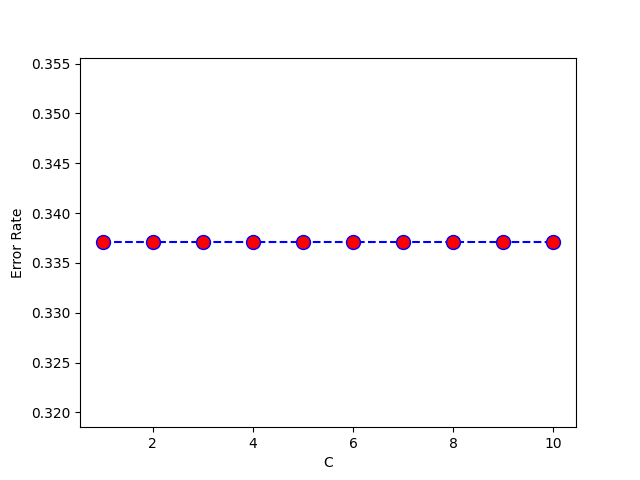

prim_diag
0.37165551839464883
4.5
y original
Counter({0.0: 5470, 2.0: 1741, 1.0: 1050, 3.0: 423, 4.0: 346, 5.0: 174, 11.0: 132, 10.0: 90, 6.0: 74, 12.0: 57, 7.0: 30, 8.0: 22, 9.0: 4})
y_train
Counter({0.0: 184, 1.0: 184, 2.0: 184, 3.0: 184, 4.0: 184, 5.0: 184, 6.0: 184, 7.0: 184, 8.0: 184, 9.0: 184, 10.0: 184, 11.0: 184, 12.0: 184})
svm Average score:  0.11932309129474128
1
2
3
4
5
6
7
8
9
10


<IPython.core.display.Javascript object>


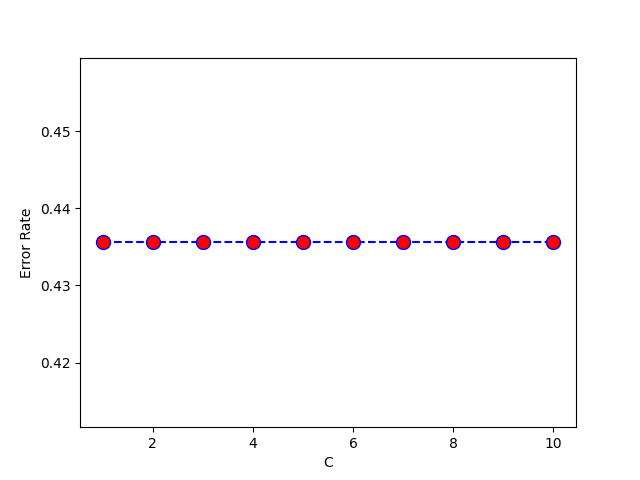

panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
pani

<IPython.core.display.Javascript object>


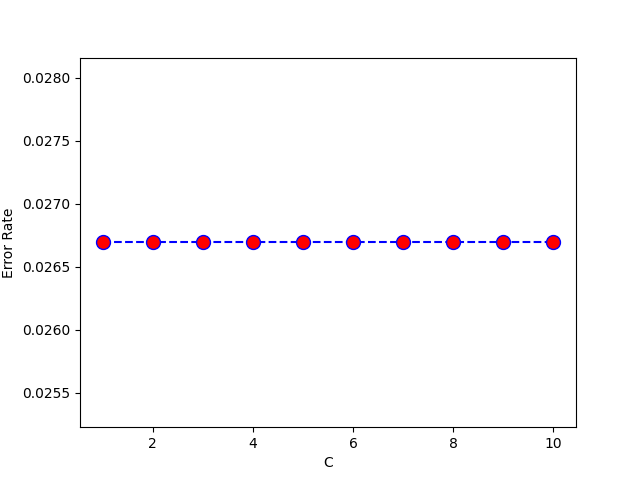

has_dep_diag
0.3655287260616153
4.5
y original
Counter({0.0: 9290, 1.0: 323})
y_train
Counter({0.0: 1201, 1.0: 1201})
svm Average score:  0.815684132204551
1
2
3
4
5
6
7
8
9
10


<IPython.core.display.Javascript object>


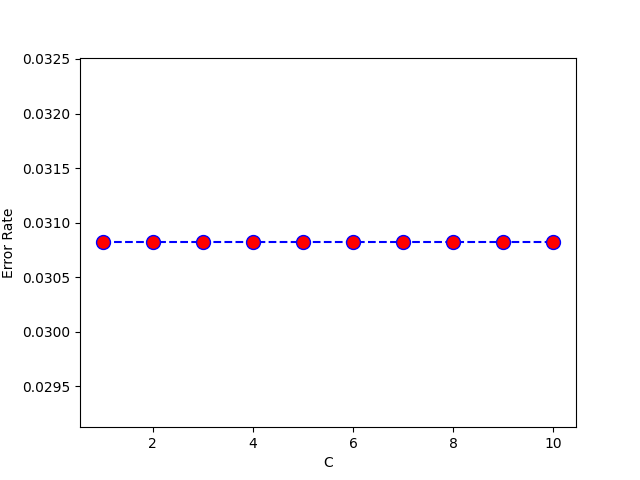

secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
secd_diag
0.4010526315789474
10.5
y original
Counter({0.0: 7541, 1.0: 942, 2.0: 835, 3.0: 106, 8.0: 68, 4.0: 55, 5.0: 30, 9.0: 18, 6.0: 16, 7.0: 2})
y_train
Counter({0.0: 95, 1.0: 95, 2.0: 95, 3.0: 95, 4.0: 95, 5.0: 95, 6.0: 95, 7.0: 95, 8.0: 95, 9.0: 95})
svm Average score:  0.2584258971188284
1
2
3
4
5
6
7
8
9
10


<IPython.core.display.Javascript object>


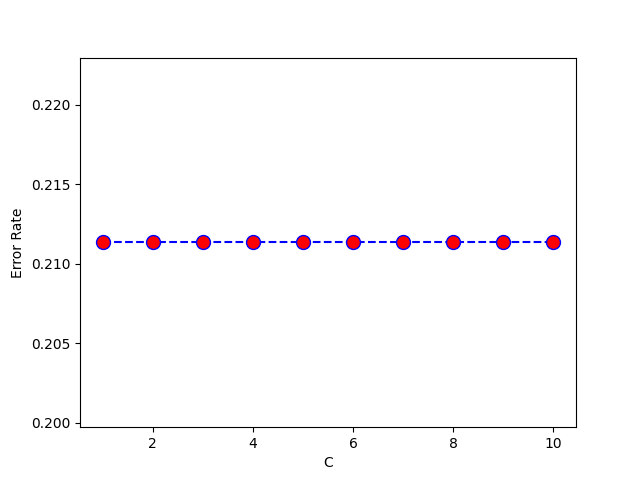

svm Average of depression variables =  0.3937371133538442


In [51]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

from sklearn import svm
scaler = StandardScaler()

totalgnb =0 
totalsvm =0 
for i in range(len(depression_vars)):
    temp = screen_time_vars + [depression_vars[i]]
    dropped = df[temp].dropna()
    y= np.rint(dropped[depression_vars[i]].to_numpy())
    dropped.pop(depression_vars[i])
    X= scaler.fit_transform(dropped)
    imputedpercent = 0.7
    factor = 4
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    while (imputedpercent > 0.41):
        smote_strat={}
        under_strat={}
        for category in Counter(y_train).keys():
            if Counter(y_train)[category] > round(len(y_train)/(len(Counter(y_train))*factor)):
                smote_strat[category] = Counter(y_train)[category]
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
            else:
                smote_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1


        smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
        under = RandomUnderSampler(sampling_strategy=under_strat)

        steps = [('o', smote), ('u', under)]
        pipeline = Pipeline(steps=steps)

        x_resample, y_resample = pipeline.fit_resample(X_train, y_train)


        #X_train,X_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3)
        svmm = svm.SVC(kernel='linear', C = 1.0)
        svmm.fit(x_resample,y_resample)
        pred = svmm.predict(X_test)
        print(depression_vars[i])

        tot = 0
        for j in range (len(Counter(y_resample))):
            if Counter(y_resample)[j]>Counter(y_train)[j]:
                tot = tot + (Counter(y_resample)[j] - Counter(y_train)[j])
        #print("percentage imputed")
        imputedpercent = tot/(Counter(y_resample)[1]*len(Counter(y_resample)))
        factor = factor + 0.5
    print(imputedpercent)
    print(factor)
    print("y original")
    print(Counter(y_train))
    print("y_train")
    print(Counter(y_resample))
    
    svmaccuracy = accuracy_score(y_test,pred)
    svmprecision= precision_score(y_test,pred,average='weighted')
    svmrecall = recall_score(y_test,pred,average='weighted')
    svmf1 = f1_score(y_test,pred,average='weighted')
    svmf2 = fbeta_score(y_test,pred,beta=2,average='weighted')
    #print("KNN Accuracy score: ",accuracy_score(y_test,pred))
    #print("KNN Precision score: ",precision_score(y_test,pred,average='weighted'))
    #print("KNN recall score: ",recall_score(y_test,pred,average='weighted'))
    #print("KNN F1 score: ",f1_score(y_test,pred,average='weighted'))
    #print("KNN F2 score: ",fbeta_score(y_test,pred,beta=2,average='weighted'))
    svmaveragescore = (svmaccuracy + svmprecision + svmrecall + svmf1 + svmf2)/5
    print("svm Average score: ",svmaveragescore)
    totalsvm +=svmaveragescore
    
    error_rate = []
    for j in range(1,11):
        svmm = svm.SVC(kernel='linear', C = j)
        svmm.fit(X_train,y_train)
        pred_j = svmm.predict(X_test)
        error_rate.append(np.mean(pred_j != y_test))
        print(j)
    plt.figure()
    plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 10)
    plt.xlabel('C')
    plt.ylabel("Error Rate")
    
print("svm Average of depression variables = ",str(totalsvm/5))


svm but all other kernals using c is 1

In [60]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

from sklearn import svm
scaler = StandardScaler()


totalsvm =0 
totalsvmp =0
totalsvmr =0
totalsvms =0 
for i in range(len(depression_vars)):
    temp = screen_time_vars + [depression_vars[i]]
    dropped = df[temp].dropna()
    y= np.rint(dropped[depression_vars[i]].to_numpy())
    dropped.pop(depression_vars[i])
    X= scaler.fit_transform(dropped)
    imputedpercent = 0.7
    factor = 4
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    while (imputedpercent > 0.41):
        smote_strat={}
        under_strat={}
        for category in Counter(y_train).keys():
            if Counter(y_train)[category] > round(len(y_train)/(len(Counter(y_train))*factor)):
                smote_strat[category] = Counter(y_train)[category]
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
            else:
                smote_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1


        smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
        under = RandomUnderSampler(sampling_strategy=under_strat)

        steps = [('o', smote), ('u', under)]
        pipeline = Pipeline(steps=steps)

        x_resample, y_resample = pipeline.fit_resample(X_train, y_train)


        #X_train,X_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3)
        svmm = svm.SVC(kernel='linear', C = 1.0)
        svmm.fit(x_resample,y_resample)
        pred = svmm.predict(X_test)
        print(depression_vars[i])

        tot = 0
        for j in range (len(Counter(y_resample))):
            if Counter(y_resample)[j]>Counter(y_train)[j]:
                tot = tot + (Counter(y_resample)[j] - Counter(y_train)[j])
        #print("percentage imputed")
        imputedpercent = tot/(Counter(y_resample)[1]*len(Counter(y_resample)))
        factor = factor + 0.5
    print(imputedpercent)
    print(factor)
    print("y original")
    print(Counter(y_train))
    print("y_train")
    print(Counter(y_resample))
    
    svmaccuracy = accuracy_score(y_test,pred)
    svmprecision= precision_score(y_test,pred,average='weighted')
    svmrecall = recall_score(y_test,pred,average='weighted')
    svmf1 = f1_score(y_test,pred,average='weighted')
    svmf2 = fbeta_score(y_test,pred,beta=2,average='weighted')
    #print("KNN Accuracy score: ",accuracy_score(y_test,pred))
    #print("KNN Precision score: ",precision_score(y_test,pred,average='weighted'))
    #print("KNN recall score: ",recall_score(y_test,pred,average='weighted'))
    #print("KNN F1 score: ",f1_score(y_test,pred,average='weighted'))
    #print("KNN F2 score: ",fbeta_score(y_test,pred,beta=2,average='weighted'))
    svmaveragescore = (svmaccuracy + svmprecision + svmrecall + svmf1 + svmf2)/5
    print("svm Average score: ",svmaveragescore)
    totalsvm +=svmaveragescore
    
    svmp = svm.SVC(kernel='poly', C = 1.0)
    svmp.fit(x_resample,y_resample)
    y_pred=svmp.predict(X_test)
    svmpaccuracy = accuracy_score(y_test,y_pred)
    svmpprecision= precision_score(y_test,y_pred,average='weighted')
    svmprecall = recall_score(y_test,y_pred,average='weighted')
    svmpf1 = f1_score(y_test,y_pred,average='weighted')
    svmpf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    svmpaveragescore = (svmpaccuracy + svmpprecision + svmprecall + svmpf1 + svmpf2)/5
    print("svmp Average score: ",svmpaveragescore)
    totalsvmp +=svmpaveragescore
    
    svmr = svm.SVC(kernel='rbf', C = 1.0)
    svmr.fit(x_resample,y_resample)
    y_pred=svmr.predict(X_test)
    svmraccuracy = accuracy_score(y_test,y_pred)
    svmrprecision= precision_score(y_test,y_pred,average='weighted')
    svmrrecall = recall_score(y_test,y_pred,average='weighted')
    svmrf1 = f1_score(y_test,y_pred,average='weighted')
    svmrf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    svmraveragescore = (svmraccuracy + svmrprecision + svmrrecall + svmrf1 + svmrf2)/5
    print("svmr Average score: ",svmraveragescore)
    totalsvmr +=svmraveragescore
    
    svms = svm.SVC(kernel='sigmoid', C = 1.0)
    svms.fit(x_resample,y_resample)
    y_pred=svms.predict(X_test)
    svmsaccuracy = accuracy_score(y_test,y_pred)
    svmsprecision= precision_score(y_test,y_pred,average='weighted')
    svmsrecall = recall_score(y_test,y_pred,average='weighted')
    svmsf1 = f1_score(y_test,y_pred,average='weighted')
    svmsf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    svmsaveragescore = (svmsaccuracy + svmsprecision + svmsrecall + svmsf1 + svmsf2)/5
    print("svms Average score: ",svmsaveragescore)
    totalsvms +=svmsaveragescore
    
    
print("svm Average of depression variables = ",str(totalsvm/5))
print("svmp Average of depression variables = ",str(totalsvmp/5))
print("svmr Average of depression variables = ",str(totalsvmr/5))
print("svms Average of depression variables = ",str(totalsvms/5))


dep_score
0.3933333333333333
4.5
y original
Counter({0.0: 6418, 1.0: 2699, 2.0: 313, 3.0: 109, 4.0: 74})
y_train
Counter({0.0: 480, 1.0: 480, 2.0: 480, 3.0: 480, 4.0: 480})
svm Average score:  0.31159706364840273
svmp Average score:  0.32901226533916983
svmr Average score:  0.35772325069268396
svms Average score:  0.23369229539431235
prim_diag
0.3704013377926421
4.5
y original
Counter({0.0: 5507, 2.0: 1715, 1.0: 1014, 3.0: 454, 4.0: 337, 5.0: 179, 11.0: 128, 10.0: 102, 6.0: 78, 12.0: 52, 7.0: 24, 8.0: 20, 9.0: 3})
y_train
Counter({0.0: 184, 1.0: 184, 2.0: 184, 3.0: 184, 4.0: 184, 5.0: 184, 6.0: 184, 7.0: 184, 8.0: 184, 9.0: 184, 10.0: 184, 11.0: 184, 12.0: 184})
svm Average score:  0.12583495421628513
svmp Average score:  0.18663955706571095
svmr Average score:  0.21112450456763066
svms Average score:  0.15085080010084723
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_score
panic_scor

naive bayes

In [58]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB #must have only positive values
from sklearn.naive_bayes import ComplementNB #must have only positive values
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB #must have only positive values

from sklearn import svm
scaler = StandardScaler()

totalgnb =0 
totalmnb =0 
totalcnb =0 
totalbnb =0 
totalcatnb =0 
for i in range(len(depression_vars)):
    temp = screen_time_vars + [depression_vars[i]]
    dropped = df[temp].dropna()
    y= np.rint(dropped[depression_vars[i]].to_numpy())
    dropped.pop(depression_vars[i])
    X= scaler.fit_transform(dropped)
    imputedpercent = 0.7
    factor = 4
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    while (imputedpercent > 0.41):
        smote_strat={}
        under_strat={}
        for category in Counter(y_train).keys():
            if Counter(y_train)[category] > round(len(y_train)/(len(Counter(y_train))*factor)):
                smote_strat[category] = Counter(y_train)[category]
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
            else:
                smote_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1


        smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
        under = RandomUnderSampler(sampling_strategy=under_strat)

        steps = [('o', smote), ('u', under)]
        pipeline = Pipeline(steps=steps)

        x_resample, y_resample = pipeline.fit_resample(X_train, y_train)


        #X_train,X_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3)
        

        tot = 0
        for j in range (len(Counter(y_resample))):
            if Counter(y_resample)[j]>Counter(y_train)[j]:
                tot = tot + (Counter(y_resample)[j] - Counter(y_train)[j])
        #print("percentage imputed")
        imputedpercent = tot/(Counter(y_resample)[1]*len(Counter(y_resample)))
        factor = factor + 0.5
    print(imputedpercent)
    print(factor)
    print("y original")
    print(Counter(y_train))
    print("y_train")
    print(Counter(y_resample))
      
    gnb=GaussianNB()
    gnb.fit(x_resample,y_resample)
    y_pred=gnb.predict(X_test)
    gnbaccuracy = accuracy_score(y_test,y_pred)
    gnbprecision= precision_score(y_test,y_pred,average='weighted')
    gnbrecall = recall_score(y_test,y_pred,average='weighted')
    gnbf1 = f1_score(y_test,y_pred,average='weighted')
    gnbf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    gnbaveragescore = (gnbaccuracy + gnbprecision + gnbrecall + gnbf1 + gnbf2)/5
    print("gnb Average score: ",gnbaveragescore)
    totalgnb +=gnbaveragescore
    
    bnb=BernoulliNB()
    bnb.fit(x_resample,y_resample)
    y_pred=bnb.predict(X_test)
    bnbaccuracy = accuracy_score(y_test,y_pred)
    bnbprecision= precision_score(y_test,y_pred,average='weighted')
    bnbrecall = recall_score(y_test,y_pred,average='weighted')
    bnbf1 = f1_score(y_test,y_pred,average='weighted')
    bnbf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    bnbaveragescore = (bnbaccuracy + bnbprecision + bnbrecall + bnbf1 + bnbf2)/5
    print("bnb Average score: ",bnbaveragescore)
    totalcnb +=bnbaveragescore
    
print("gnb Average of depression variables = ",str(totalgnb/5))
print("bnb Average of depression variables = ",str(totalbnb/5))


0.39458333333333334
4.5
y original
Counter({0.0: 6413, 1.0: 2707, 2.0: 314, 3.0: 116, 4.0: 63})
y_train
Counter({0.0: 480, 1.0: 480, 2.0: 480, 3.0: 480, 4.0: 480})
gnb Average score:  0.28083175738588156
bnb Average score:  0.23760801142680874
0.36998327759197325
4.5
y original
Counter({0.0: 5427, 2.0: 1760, 1.0: 1038, 3.0: 461, 4.0: 340, 5.0: 170, 11.0: 132, 10.0: 95, 6.0: 82, 12.0: 54, 7.0: 33, 8.0: 17, 9.0: 4})
y_train
Counter({0.0: 184, 1.0: 184, 2.0: 184, 3.0: 184, 4.0: 184, 5.0: 184, 6.0: 184, 7.0: 184, 8.0: 184, 9.0: 184, 10.0: 184, 11.0: 184, 12.0: 184})
gnb Average score:  0.11606859110647502
bnb Average score:  0.10321735915141676
0.4095238095238095
45.0
y original
Counter({0.0: 9389, 1.0: 184, 2.0: 21, 3.0: 12, 4.0: 7})
y_train
Counter({0.0: 42, 1.0: 42, 2.0: 42, 3.0: 42, 4.0: 42})
gnb Average score:  0.3621549831235079
bnb Average score:  0.3723644150189361
0.36636136552872606
4.5
y original
Counter({0.0: 9292, 1.0: 321})
y_train
Counter({0.0: 1201, 1.0: 1201})
gnb Average 

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


adaboost


0.3829166666666667
4.5
y original
Counter({0.0: 6375, 1.0: 2717, 2.0: 343, 3.0: 106, 4.0: 72})
y_train
Counter({0.0: 480, 1.0: 480, 2.0: 480, 3.0: 480, 4.0: 480})
ada Average score:  0.2953131746606865


<IPython.core.display.Javascript object>


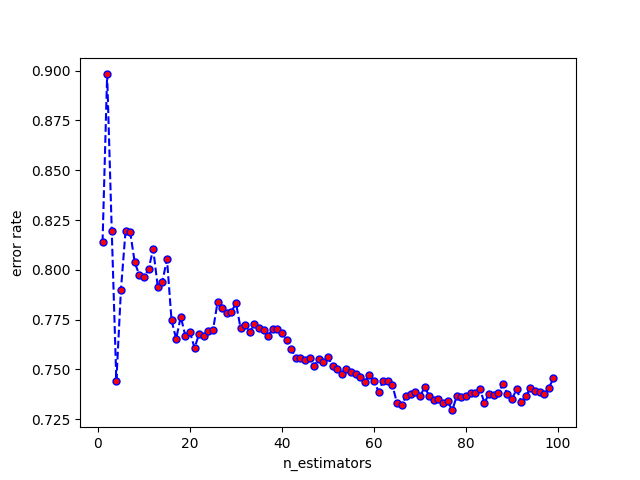

0.36789297658862874
4.5
y original
Counter({0.0: 5475, 2.0: 1726, 1.0: 1032, 3.0: 455, 4.0: 333, 5.0: 181, 11.0: 132, 10.0: 99, 6.0: 71, 12.0: 53, 7.0: 33, 8.0: 21, 9.0: 2})
y_train
Counter({0.0: 184, 1.0: 184, 2.0: 184, 3.0: 184, 4.0: 184, 5.0: 184, 6.0: 184, 7.0: 184, 8.0: 184, 9.0: 184, 10.0: 184, 11.0: 184, 12.0: 184})
ada Average score:  0.13957382283960834


<IPython.core.display.Javascript object>


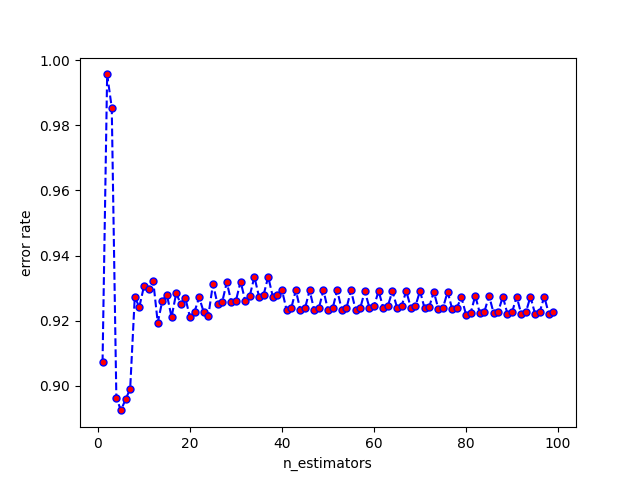

0.40540540540540543
50.5
y original
Counter({0.0: 9379, 1.0: 198, 2.0: 23, 3.0: 8, 4.0: 5})
y_train
Counter({0.0: 37, 1.0: 37, 2.0: 37, 3.0: 37, 4.0: 37})
ada Average score:  0.3031663854712313


<IPython.core.display.Javascript object>


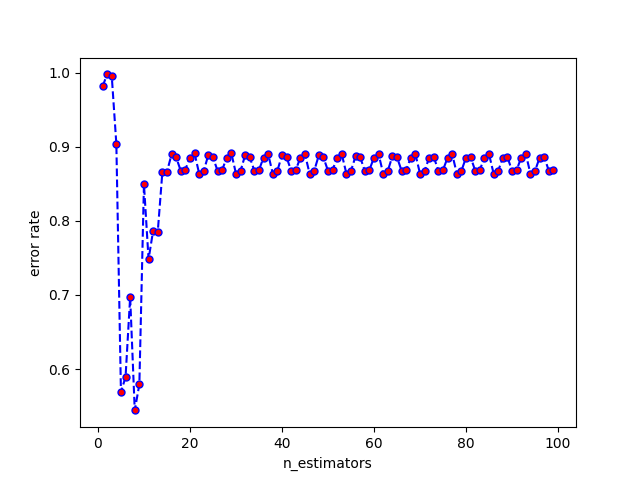

0.36261448792672774
4.5
y original
Counter({0.0: 9283, 1.0: 330})
y_train
Counter({0.0: 1201, 1.0: 1201})
ada Average score:  0.7366952718305642


<IPython.core.display.Javascript object>


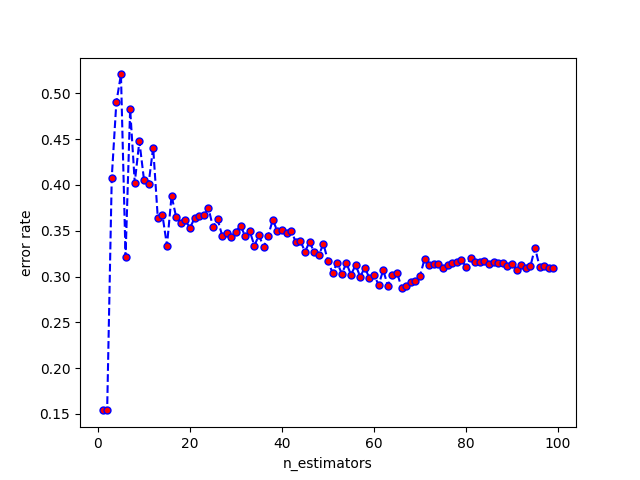

0.4073684210526316
10.5
y original
Counter({0.0: 7572, 1.0: 930, 2.0: 825, 3.0: 103, 8.0: 65, 4.0: 60, 5.0: 28, 9.0: 17, 6.0: 11, 7.0: 2})
y_train
Counter({0.0: 95, 1.0: 95, 2.0: 95, 3.0: 95, 4.0: 95, 5.0: 95, 6.0: 95, 7.0: 95, 8.0: 95, 9.0: 95})
ada Average score:  0.18365039252351528


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>


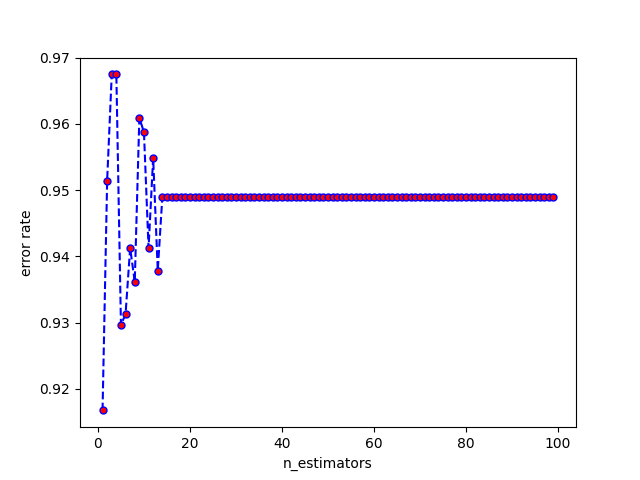

ada Average of depression variables =  0.3316798094651211


In [63]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
scaler = StandardScaler()

totalada =0 
for i in range(len(depression_vars)):
    temp = screen_time_vars + [depression_vars[i]]
    dropped = df[temp].dropna()
    y= np.rint(dropped[depression_vars[i]].to_numpy())
    dropped.pop(depression_vars[i])
    X= scaler.fit_transform(dropped)
    imputedpercent = 0.7
    factor = 4
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    while (imputedpercent > 0.41):
        smote_strat={}
        under_strat={}
        for category in Counter(y_train).keys():
            if Counter(y_train)[category] > round(len(y_train)/(len(Counter(y_train))*factor)):
                smote_strat[category] = Counter(y_train)[category]
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
            else:
                smote_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1
                under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*factor)))-1


        smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
        under = RandomUnderSampler(sampling_strategy=under_strat)

        steps = [('o', smote), ('u', under)]
        pipeline = Pipeline(steps=steps)

        x_resample, y_resample = pipeline.fit_resample(X_train, y_train)

        tot = 0
        for j in range (len(Counter(y_resample))):
            if Counter(y_resample)[j]>Counter(y_train)[j]:
                tot = tot + (Counter(y_resample)[j] - Counter(y_train)[j])
        #print("percentage imputed")
        imputedpercent = tot/(Counter(y_resample)[1]*len(Counter(y_resample)))
        factor = factor + 0.5
    print(imputedpercent)
    print(factor)
    print("y original")
    print(Counter(y_train))
    print("y_train")
    print(Counter(y_resample))
    
    ada=AdaBoostClassifier(n_estimators=20)
    ada.fit(x_resample,y_resample)
    y_pred=ada.predict(X_test)
    adaaccuracy = accuracy_score(y_test,y_pred)
    adaprecision= precision_score(y_test,y_pred,average='weighted')
    adarecall = recall_score(y_test,y_pred,average='weighted')
    adaf1 = f1_score(y_test,y_pred,average='weighted')
    adaf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    adaaveragescore = (adaaccuracy + adaprecision + adarecall + adaf1 + adaf2)/5
    print("ada Average score: ",adaaveragescore)
    totalada +=adaaveragescore
    
    error_rate = []
    for j in range(1,100):
        ada=AdaBoostClassifier(n_estimators=j)
        ada.fit(x_resample,y_resample)
        pred_j = ada.predict(X_test)
        #forrestaccuracy = accuracy_score(y_test,pred_j)
        #forrestprecision= precision_score(y_test,pred_j,average='weighted')
        #forrestrecall = recall_score(y_test,pred_j,average='weighted')
        #forrestf1 = f1_score(y_test,pred_j,average='weighted')
        #forrestf2 = fbeta_score(y_test,pred_j,beta=2,average='weighted')
        #forrestaveragescore = (forrestaccuracy + forrestprecision + forrestrecall + forrestf1 + forrestf2)/5
        error_rate.append(np.mean(pred_j != y_test))

    plt.figure()
    plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 5)
    plt.xlabel('n_estimators')
    plt.ylabel("error rate")
    
    
print("ada Average of depression variables = ",str(totalada/5))

not resampling any data,

using imputed data

In [133]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()

X= scaler.fit_transform(knn_df)
y= np.rint(df[depression_vars[i]].to_numpy())
totalknn =0 
totalforrest =0 
for i in range(len(depression_vars)):
    X= scaler.fit_transform(knn_df)
    y= np.rint(df[depression_vars[i]].to_numpy())
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    print(depression_vars[i])
    knnaccuracy = accuracy_score(y_test,pred)
    knnprecision= precision_score(y_test,pred,average='weighted')
    knnrecall = recall_score(y_test,pred,average='weighted')
    knnf1 = f1_score(y_test,pred,average='weighted')
    knnf2 = fbeta_score(y_test,pred,beta=2,average='weighted')
    #print("KNN Accuracy score: ",accuracy_score(y_test,pred))
    #print("KNN Precision score: ",precision_score(y_test,pred,average='weighted'))
    #print("KNN recall score: ",recall_score(y_test,pred,average='weighted'))
    #print("KNN F1 score: ",f1_score(y_test,pred,average='weighted'))
    #print("KNN F2 score: ",fbeta_score(y_test,pred,beta=2,average='weighted'))
    knnaveragescore = (knnaccuracy + knnprecision + knnrecall + knnf1 + knnf2)/5
    print("KNN Average score: ",knnaveragescore)
    totalknn +=knnaveragescore
    """
    error_rate = []
    for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    plt.figure()
    plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 10)
    plt.xlabel('K')
    plt.ylabel("Error Rate")
    """
    clf=RandomForestClassifier(n_estimators=20)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    forrestaccuracy = accuracy_score(y_test,y_pred)
    forrestprecision= precision_score(y_test,y_pred,average='weighted')
    forrestrecall = recall_score(y_test,y_pred,average='weighted')
    forrestf1 = f1_score(y_test,y_pred,average='weighted')
    forrestf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    forrestaveragescore = (forrestaccuracy + forrestprecision + forrestrecall + forrestf1 + forrestf2)/5
    print("forrest Average score: ",forrestaveragescore)
    totalforrest +=forrestaveragescore
print("KNN Average of depression variables = ",str(totalknn/5))
print("KNN Average of depression variables = ",str(totalforrest/5))



dep_score
KNN Average score:  0.5969606697721029
forrest Average score:  0.6423677093157566
prim_diag
KNN Average score:  0.4844244098598251


C:\Users\mathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


forrest Average score:  0.5408718784131551
panic_score
KNN Average score:  0.9622279789088763
forrest Average score:  0.9761550259287859


C:\Users\mathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


has_dep_diag
KNN Average score:  0.9450259360941538
forrest Average score:  0.9582026824872976
secd_diag
KNN Average score:  0.7128405982030147
forrest Average score:  0.7732749186013054
KNN Average of depression variables =  0.7402959185675946
KNN Average of depression variables =  0.7781744429492602


C:\Users\mathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mathi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


resampling only train data,

oversampling till a factor of a 4th less of the data,

not using imputed data but dropping na's

Counter({0.0: 2161, 1.0: 299, 2.0: 186, 3.0: 107, 4.0: 63})
{0.0: 140, 3.0: 140, 1.0: 140, 2.0: 140, 4.0: 140}
(700, 10)
(212, 10)
dep_score
KNN Average score:  0.46399014461047533
forrest Average score:  0.30839042470054434


<IPython.core.display.Javascript object>


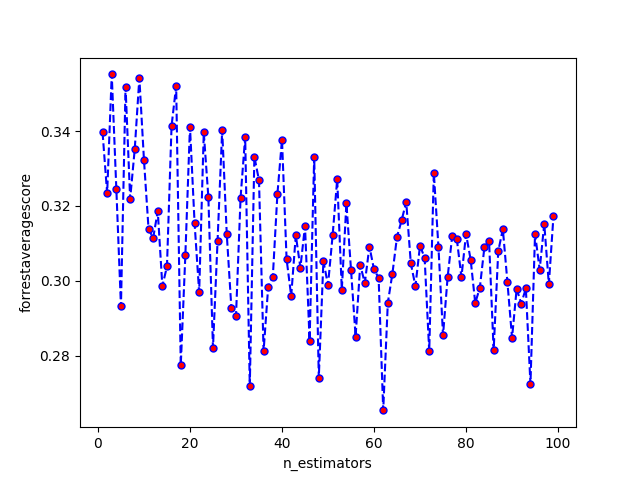

Counter({0.0: 2247, 1.0: 163, 11.0: 101, 10.0: 70, 2.0: 63, 12.0: 53, 5.0: 52, 6.0: 41, 8.0: 13, 4.0: 7, 7.0: 4, 9.0: 2})
{12.0: 58, 0.0: 58, 1.0: 58, 11.0: 58, 2.0: 58, 5.0: 58, 10.0: 58, 6.0: 58, 9.0: 58, 4.0: 58, 8.0: 58, 7.0: 58}
(696, 10)
(212, 10)
prim_diag
KNN Average score:  0.2644231847000405
forrest Average score:  0.21978959985195382


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetri

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetri

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning

<IPython.core.display.Javascript object>


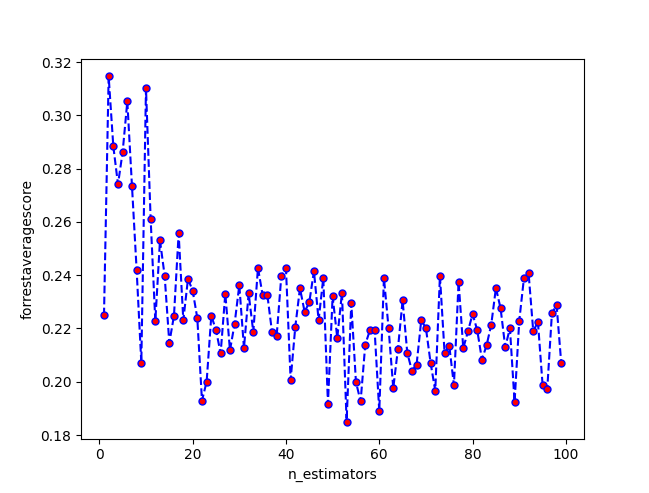

Counter({0.0: 2762, 1.0: 25, 2.0: 14, 3.0: 9, 4.0: 6})
{0.0: 140, 2.0: 140, 3.0: 140, 1.0: 140, 4.0: 140}
(700, 10)
(212, 10)
panic_score
KNN Average score:  0.7511775848264003
forrest Average score:  0.8563437459727268


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall

<IPython.core.display.Javascript object>


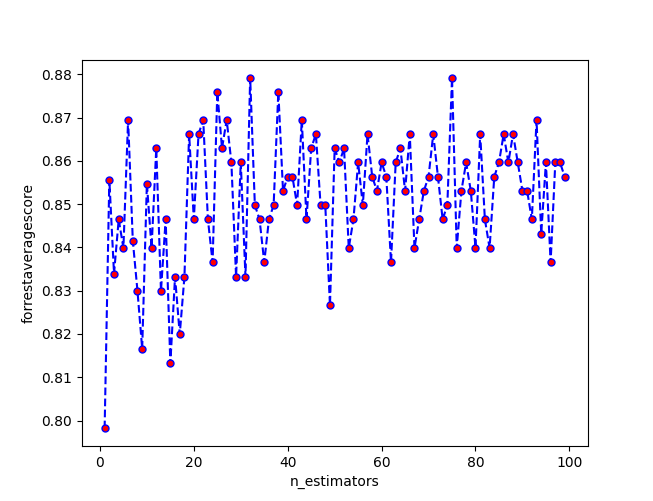

Counter({0.0: 2588, 1.0: 228})
{0.0: 351, 1.0: 351}
(702, 10)
(212, 10)
has_dep_diag
KNN Average score:  0.7389076471892718
forrest Average score:  0.7155616823664339


<IPython.core.display.Javascript object>


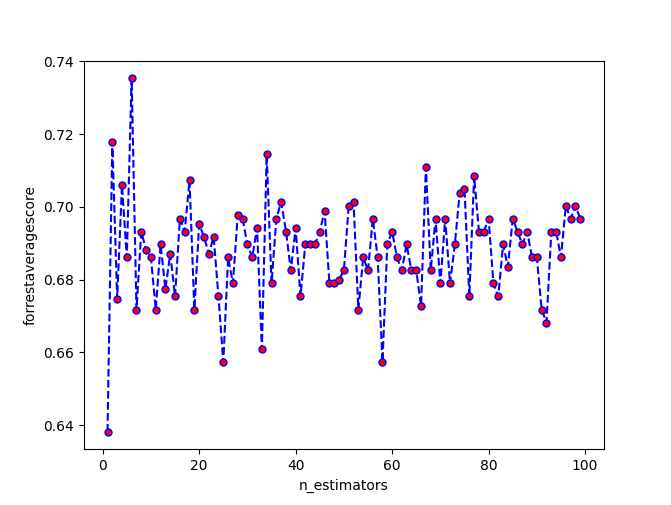

Counter({0.0: 2517, 1.0: 123, 8.0: 51, 4.0: 36, 2.0: 31, 5.0: 27, 9.0: 15, 6.0: 13, 7.0: 3})
{0.0: 77, 4.0: 77, 1.0: 77, 6.0: 77, 8.0: 77, 2.0: 77, 9.0: 77, 5.0: 77, 7.0: 77}
(693, 10)
(212, 10)
secd_diag
KNN Average score:  0.5163802394410647
forrest Average score:  0.4340656752702315


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall

<IPython.core.display.Javascript object>


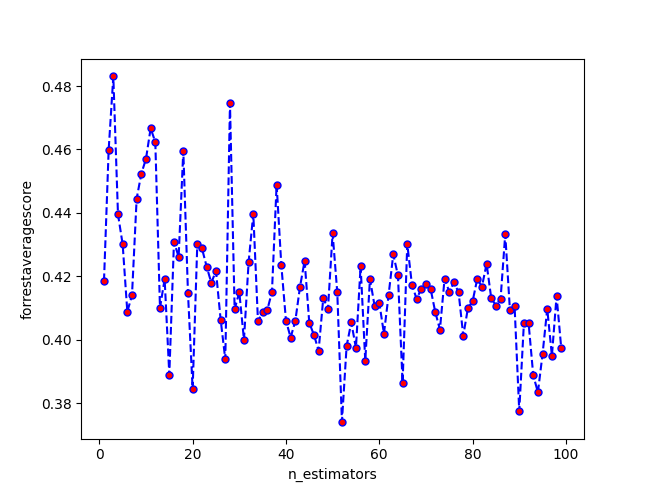

KNN Average of depression variables =  0.5469757601534505
Forrest Average of depression variables =  0.5068302256323781


In [6]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()

totalknn =0 
totalforrest =0 
for i in range(len(depression_vars)):
    temp = screen_time_vars + [depression_vars[i]]
    dropped = df_nas[temp].dropna()
    y= np.rint(dropped[depression_vars[i]].to_numpy())
    dropped.pop(depression_vars[i])
    X= scaler.fit_transform(dropped)
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.07)
    smote_strat={}
    under_strat={}
    for category in Counter(y_train).keys():
        if Counter(y_train)[category] > round(len(y_train)/(len(Counter(y_train))*4)):
            smote_strat[category] = Counter(y_train)[category]
            under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*4)))-1
        else:
            smote_strat[category] = (round(len(y_train)/(len(Counter(y_train))*4)))-1
            under_strat[category] = (round(len(y_train)/(len(Counter(y_train))*4)))-1
    print(Counter(y_train))
    print(under_strat)
    smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
    under = RandomUnderSampler(sampling_strategy=under_strat)

    steps = [('o', smote), ('u', under)]
    pipeline = Pipeline(steps=steps)
    # fit predictor and target variable
    x_resample, y_resample = pipeline.fit_resample(X_train, y_train)
    print(x_resample.shape)
    print(X_test.shape)
    #X_train,X_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_resample,y_resample)
    pred = knn.predict(X_test)
    print(depression_vars[i])
    knnaccuracy = accuracy_score(y_test,pred)
    knnprecision= precision_score(y_test,pred,average='weighted')
    knnrecall = recall_score(y_test,pred,average='weighted')
    knnf1 = f1_score(y_test,pred,average='weighted')
    knnf2 = fbeta_score(y_test,pred,beta=2,average='weighted')
    #print("KNN Accuracy score: ",accuracy_score(y_test,pred))
    #print("KNN Precision score: ",precision_score(y_test,pred,average='weighted'))
    #print("KNN recall score: ",recall_score(y_test,pred,average='weighted'))
    #print("KNN F1 score: ",f1_score(y_test,pred,average='weighted'))
    #print("KNN F2 score: ",fbeta_score(y_test,pred,beta=2,average='weighted'))
    knnaveragescore = (knnaccuracy + knnprecision + knnrecall + knnf1 + knnf2)/5
    print("KNN Average score: ",knnaveragescore)
    totalknn +=knnaveragescore
    """
    error_rate = []
    for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    plt.figure()
    plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 10)
    plt.xlabel('K')
    plt.ylabel("Error Rate")
    """
    clf=RandomForestClassifier(n_estimators=20)
    clf.fit(x_resample,y_resample)
    y_pred=clf.predict(X_test)
    forrestaccuracy = accuracy_score(y_test,y_pred)
    forrestprecision= precision_score(y_test,y_pred,average='weighted')
    forrestrecall = recall_score(y_test,y_pred,average='weighted')
    forrestf1 = f1_score(y_test,y_pred,average='weighted')
    forrestf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    forrestaveragescore = (forrestaccuracy + forrestprecision + forrestrecall + forrestf1 + forrestf2)/5
    print("forrest Average score: ",forrestaveragescore)
    totalforrest +=forrestaveragescore
    
    error_rate = []
    for i in range(1,100):
        clf=RandomForestClassifier(n_estimators=i)
        clf.fit(x_resample,y_resample)
        pred_i = clf.predict(X_test)
        forrestaccuracy = accuracy_score(y_test,pred_i)
        forrestprecision= precision_score(y_test,pred_i,average='weighted')
        forrestrecall = recall_score(y_test,pred_i,average='weighted')
        forrestf1 = f1_score(y_test,pred_i,average='weighted')
        forrestf2 = fbeta_score(y_test,pred_i,beta=2,average='weighted')
        forrestaveragescore = (forrestaccuracy + forrestprecision + forrestrecall + forrestf1 + forrestf2)/5
        error_rate.append(forrestaveragescore)

    plt.figure()
    plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 5)
    plt.xlabel('n_estimators')
    plt.ylabel("forrestaveragescore")
    
print("KNN Average of depression variables = ",str(totalknn/5))
print("Forrest Average of depression variables = ",str(totalforrest/5))


resampling train and test data,

oversampling till a factor of a 4th less of the data,

not using imputed data but dropping na's

Counter({0.0: 2330, 1.0: 313, 2.0: 197, 3.0: 120, 4.0: 68})
{0.0: 150, 2.0: 150, 3.0: 150, 1.0: 150, 4.0: 150}
dep_score
KNN Average score:  0.36588476117052887
forrest Average score:  0.31184609167447186


<IPython.core.display.Javascript object>


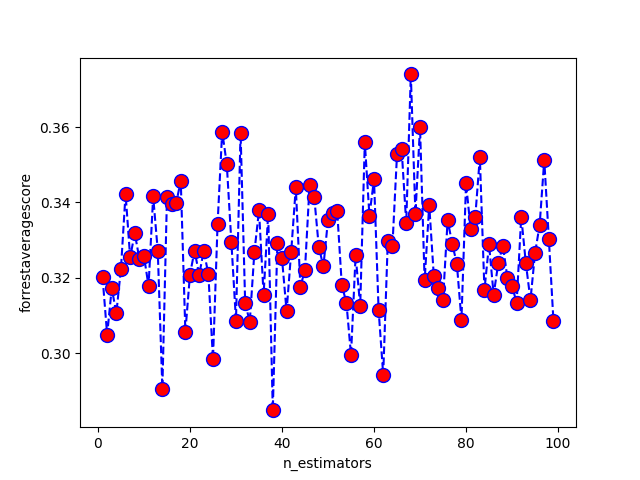

Counter({0.0: 2417, 1.0: 178, 11.0: 110, 10.0: 75, 2.0: 64, 12.0: 56, 5.0: 54, 6.0: 46, 8.0: 14, 4.0: 7, 7.0: 4, 9.0: 3})
{0.0: 62, 5.0: 62, 1.0: 62, 11.0: 62, 8.0: 62, 12.0: 62, 2.0: 62, 10.0: 62, 7.0: 62, 6.0: 62, 4.0: 62, 9.0: 62}
prim_diag
KNN Average score:  0.44294694875732255
forrest Average score:  0.4011526645723887


<IPython.core.display.Javascript object>


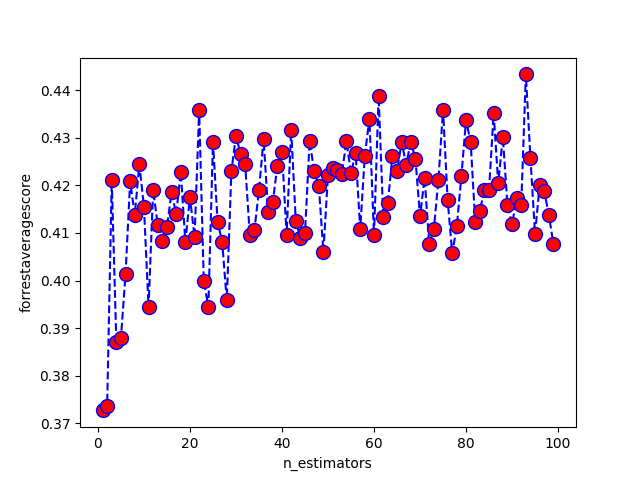

Counter({0.0: 2969, 1.0: 27, 2.0: 14, 3.0: 10, 4.0: 8})
{0.0: 150, 1.0: 150, 3.0: 150, 4.0: 150, 2.0: 150}
panic_score
KNN Average score:  0.8945484248203865
forrest Average score:  0.920511334579899


<IPython.core.display.Javascript object>


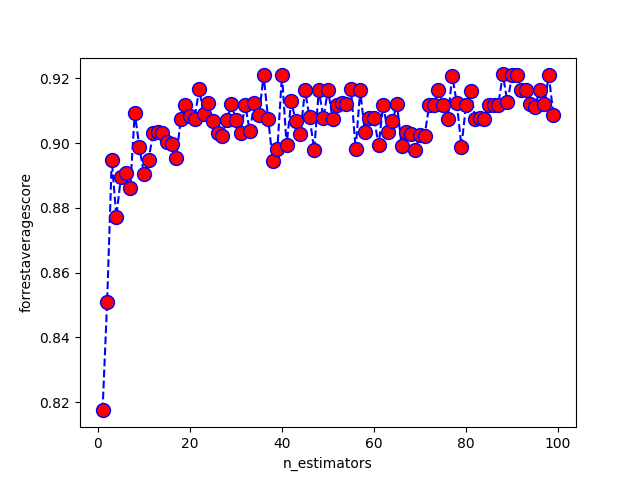

Counter({0.0: 2787, 1.0: 241})
{0.0: 377, 1.0: 377}
has_dep_diag
KNN Average score:  0.5857354589885122
forrest Average score:  0.6079884642130138


<IPython.core.display.Javascript object>


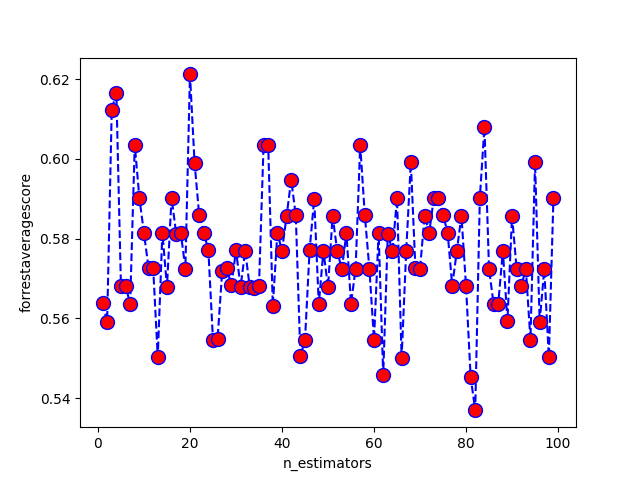

Counter({0.0: 2707, 1.0: 136, 8.0: 55, 4.0: 37, 2.0: 31, 5.0: 28, 9.0: 17, 6.0: 14, 7.0: 3})
{0.0: 83, 4.0: 83, 2.0: 83, 6.0: 83, 1.0: 83, 8.0: 83, 5.0: 83, 9.0: 83, 7.0: 83}
secd_diag
KNN Average score:  0.6242575343711457
forrest Average score:  0.6061334257978583


<IPython.core.display.Javascript object>


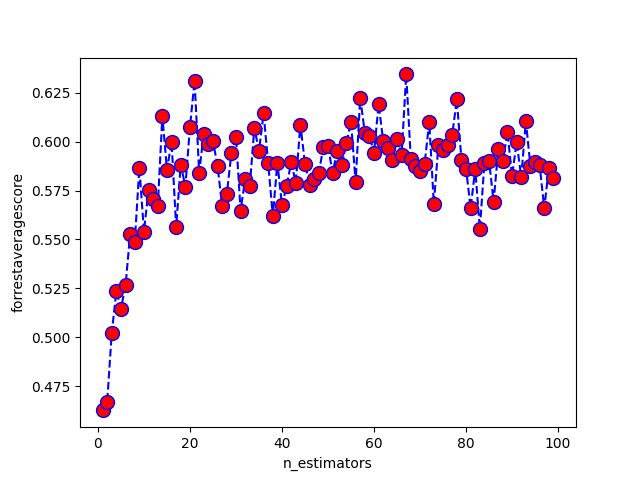

KNN Average of depression variables =  0.5826746256215791
forrest Average of depression variables =  0.5695263961675263


In [6]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.ensemble import RandomForestClassifier
scaler = StandardScaler()

totalknn =0 
totalforrest =0 
for i in range(len(depression_vars)):
    temp = screen_time_vars + [depression_vars[i]]
    dropped = df_nas[temp].dropna()
    y= np.rint(dropped[depression_vars[i]].to_numpy())
    dropped.pop(depression_vars[i])
    X= scaler.fit_transform(dropped)
    
    #X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
    smote_strat={}
    under_strat={}
    for category in Counter(y).keys():
        if Counter(y)[category] > round(len(y)/(len(Counter(y))*4)):
            smote_strat[category] = Counter(y)[category]
            under_strat[category] = (round(len(y)/(len(Counter(y))*4)))-1
        else:
            smote_strat[category] = (round(len(y)/(len(Counter(y))*4)))-1
            under_strat[category] = (round(len(y)/(len(Counter(y))*4)))-1
    print(Counter(y))
    print(under_strat)
    smote = SMOTE(sampling_strategy=smote_strat,k_neighbors = 1)
    under = RandomUnderSampler(sampling_strategy=under_strat)

    steps = [('o', smote), ('u', under)]
    pipeline = Pipeline(steps=steps)
    # fit predictor and target variable
    x_resample, y_resample = pipeline.fit_resample(X, y)
    X_train,X_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    print(depression_vars[i])
    knnaccuracy = accuracy_score(y_test,pred)
    knnprecision= precision_score(y_test,pred,average='weighted')
    knnrecall = recall_score(y_test,pred,average='weighted')
    knnf1 = f1_score(y_test,pred,average='weighted')
    knnf2 = fbeta_score(y_test,pred,beta=2,average='weighted')
    #print("KNN Accuracy score: ",accuracy_score(y_test,pred))
    #print("KNN Precision score: ",precision_score(y_test,pred,average='weighted'))
    #print("KNN recall score: ",recall_score(y_test,pred,average='weighted'))
    #print("KNN F1 score: ",f1_score(y_test,pred,average='weighted'))
    #print("KNN F2 score: ",fbeta_score(y_test,pred,beta=2,average='weighted'))
    knnaveragescore = (knnaccuracy + knnprecision + knnrecall + knnf1 + knnf2)/5
    print("KNN Average score: ",knnaveragescore)
    totalknn +=knnaveragescore
    """
    error_rate = []
    for i in range(1,50):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))
    plt.figure()
    plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 10)
    plt.xlabel('K')
    plt.ylabel("Error Rate")
    """
    clf=RandomForestClassifier(n_estimators=20)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    forrestaccuracy = accuracy_score(y_test,y_pred)
    forrestprecision= precision_score(y_test,y_pred,average='weighted')
    forrestrecall = recall_score(y_test,y_pred,average='weighted')
    forrestf1 = f1_score(y_test,y_pred,average='weighted')
    forrestf2 = fbeta_score(y_test,y_pred,beta=2,average='weighted')
    #print("Random Forrest Accuracy score: ",accuracy_score(y_test,y_pred))
    #print("Random Forrest Precision score: ",precision_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest recall score: ",recall_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F1 score: ",f1_score(y_test,y_pred,average='weighted'))
    #print("Random Forrest F2 score: ",fbeta_score(y_test,y_pred,beta=2,average='weighted'))
    forrestaveragescore = (forrestaccuracy + forrestprecision + forrestrecall + forrestf1 + forrestf2)/5
    print("forrest Average score: ",forrestaveragescore)
    totalforrest +=forrestaveragescore
    
    error_rate = []
    for i in range(1,100):
        clf=RandomForestClassifier(n_estimators=i)
        clf.fit(X_train,y_train)
        pred_i = clf.predict(X_test)
        forrestaccuracy = accuracy_score(y_test,pred_i)
        forrestprecision= precision_score(y_test,pred_i,average='weighted')
        forrestrecall = recall_score(y_test,pred_i,average='weighted')
        forrestf1 = f1_score(y_test,pred_i,average='weighted')
        forrestf2 = fbeta_score(y_test,pred_i,beta=2,average='weighted')
        forrestaveragescore = (forrestaccuracy + forrestprecision + forrestrecall + forrestf1 + forrestf2)/5
        error_rate.append(forrestaveragescore)

    plt.figure()
    plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 10)
    plt.xlabel('n_estimators')
    plt.ylabel("forrestaveragescore")
    
print("KNN Average of depression variables = ",str(totalknn/5))
print("forrest Average of depression variables = ",str(totalforrest/5))


<IPython.core.display.Javascript object>


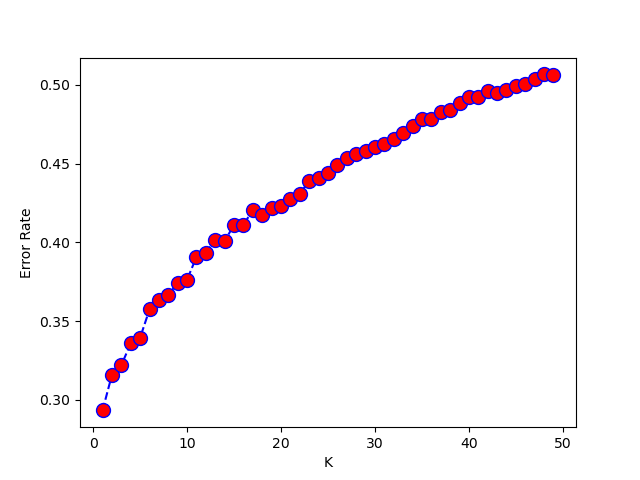

Text(0, 0.5, 'Error Rate')

In [11]:
error_rate = []
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 10)
plt.xlabel('K')
plt.ylabel("Error Rate")

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_resample,y_resample)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))
feature_imp = pd.Series(clf.feature_importances_,index=["text_wend","talk_mob_wend","text_week","talk_mob_week","talk_phon_wend","talk_phon_week","tv_week","tv_wend","comp_wend","comp_week"]).sort_values(ascending=False)
feature_imp
error_rate = []
scores = []
for i in range(1,50):
    clf=RandomForestClassifier(n_estimators=i)
    clf.fit(x_resample,y_resample)
    pred_i = clf.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    forrestaccuracy = accuracy_score(y_test,pred_i)
    forrestprecision= precision_score(y_test,pred_i,average='weighted')
    forrestrecall = recall_score(y_test,pred_i,average='weighted')
    forrestf1 = f1_score(y_test,pred_i,average='weighted')
    forrestf2 = fbeta_score(y_test,pred_i,beta=2,average='weighted')
    forrestaveragescore = (forrestaccuracy + forrestprecision + forrestrecall + forrestf1 + forrestf2)/5
    scores.append(forrestaveragescore)

plt.figure()
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 10)
plt.xlabel('n_estimators')
plt.ylabel("Error Rate")

plt.figure()
plt.plot(range(1,50),scores,color='blue', linestyle='dashed',marker='o',markerfacecolor = 'red',markersize = 10)
plt.xlabel('n_estimators')
plt.ylabel("scores")

NameError: name 'x_resample' is not defined